In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate_nn as srnn
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')
import seaborn as sns

**Generate data**

In [26]:
L63_data_path = '../data/L63-trajectories'
save_folder = '../data/bunching-2'
name = 'nn'
D_r = 5000
N = 20000
L0 = 0.4
L1 = 3.5
bunching_threshold = 0.05
n_sample = 1
beta = 4e-5
partition = [5000, 0, 0]
train = np.load(f'{L63_data_path}/train.npy')[:, :N].astype(np.float64)
test = np.load(f'{L63_data_path}/test.npy')[:, :, :1000].astype(np.float64)

x = torch.Tensor(train.T[:-1])
y = torch.Tensor(train.T[1:])

model = srnn.SurrogateModel_NN(3, 5000, name=name, save_folder=save_folder)
Ms = []
ms = []
bunching = []
left_bunching = []
right_bunching = []
loss = []
tau_f = []

for i in range(n_sample):
    print(f'working on sample#{i}')
    # model.load(i)
    model.init_with_rf(L0, L1, beta, train, partition=partition)
    M, m, B, l, r = model.compute_bunching(L0, L1, train, bunching_threshold)

    
np.save(f'{model.save_folder}/Ms.npy', Ms)
np.save(f'{model.save_folder}/ms.npy', ms)
# np.save(f'{model.save_folder}/bunching.npy', bunching)
# np.save(f'{model.save_folder}/left_bunching.npy', left_bunching)
# np.save(f'{model.save_folder}/right_bunching.npy', right_bunching)
# np.save(f'{model.save_folder}/tau_f.npy', tau_f)
# np.save(f'{model.save_folder}/loss.npy', loss)
# model.write_config()

working on sample#0


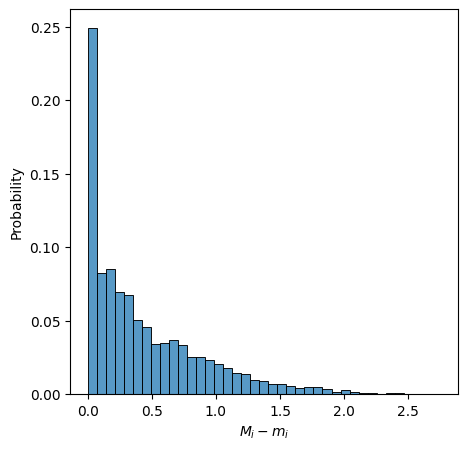

In [48]:
# M_r = np.load(f'{model.save_folder}/Ms.npy')
# m_r = np.load(f'{model.save_folder}/ms.npy')
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$M_i-m_i$')
sns.histplot(M-m, stat='probability', ax=ax1)
# sns.histplot(M_r-m_r, bins=10)
# plt.title(r'distribution of $X=\mathbb{E}[M_r-m_r]$, $\mathbb{E}[X]=$'+f'{(M_r-m_r).mean():.2f}')
plt.savefig(f'{model.save_folder}/single_RF_M-m.png')

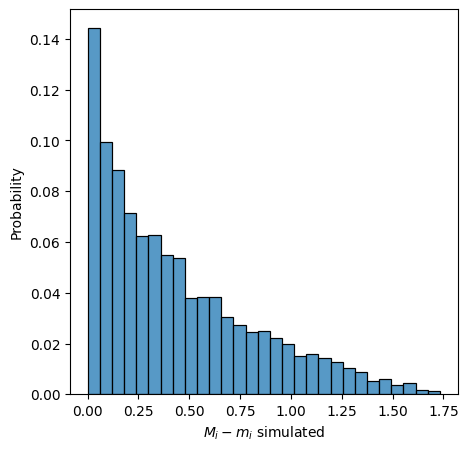

In [47]:
n, eps = 5000, 0.67
for i in range(1):
    Mr = np.random.uniform(low=0.4+eps, high=3.5-eps, size=n)
    mr = np.array([np.random.uniform(low=0.4+eps, high=M) for M in Mr])
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$M_i-m_i$ simulated')
sns.histplot(Mr-mr, stat='probability', ax=ax1)
plt.savefig(f'{model.save_folder}/simulated_M-m.png')

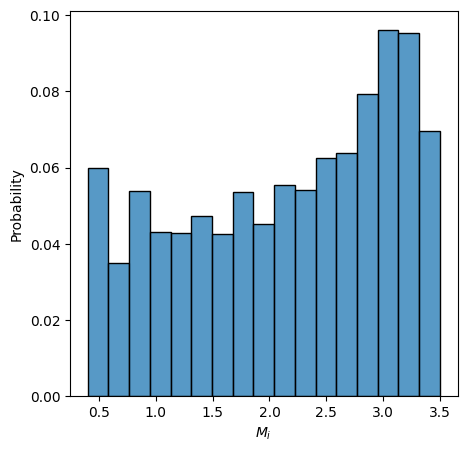

In [45]:
# M_r = np.load(f'{model.save_folder}/Ms.npy')
# m_r = np.load(f'{model.save_folder}/ms.npy')
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$M_i$')
sns.histplot(M, stat='probability', ax=ax1)
# sns.histplot(M_r-m_r, bins=10)
# plt.title(r'distribution of $X=\mathbb{E}[M_r-m_r]$, $\mathbb{E}[X]=$'+f'{(M_r-m_r).mean():.2f}')
plt.savefig(f'{model.save_folder}/single_RF_M.png')

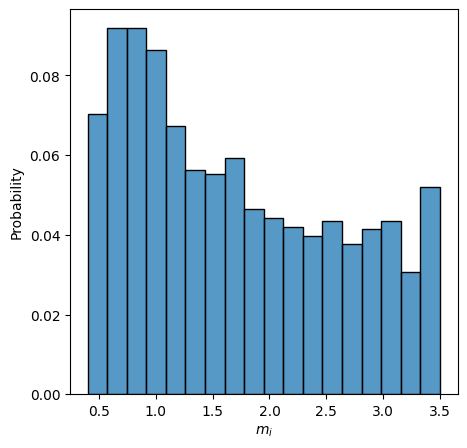

In [46]:
# M_r = np.load(f'{model.save_folder}/Ms.npy')
# m_r = np.load(f'{model.save_folder}/ms.npy')
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$m_i$')
sns.histplot(m, stat='probability', ax=ax1)
# sns.histplot(M_r-m_r, bins=10)
# plt.title(r'distribution of $X=\mathbb{E}[M_r-m_r]$, $\mathbb{E}[X]=$'+f'{(M_r-m_r).mean():.2f}')
plt.savefig(f'{model.save_folder}/single_m.png')